In [4]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
dataset = pd.read_csv('IMDB-Movie-Data.csv')

In [6]:
dataset.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 74.3+ KB


In [8]:
dataset_desc = dataset.describe()

In [9]:
# take part of data  for Iputation , Encoding etc.
Revenue = dataset.iloc[:,10:11].values
Metascore = dataset.iloc[:,11:].values
Genre = dataset.iloc[:,2:3].values
Director = dataset.iloc[:,4:5].values
Votes = dataset.iloc[:,9:10].values

In [24]:
# scatter plot 
plt.figure(figsize=(15,6)) 
plt.scatter(dataset['Rating'],dataset['Revenue (Millions)']) 
plt.xlabel('RATE',color = 'red').set_size(20) 
plt.ylabel('REVENUE',color = 'yellow').set_size(20) 

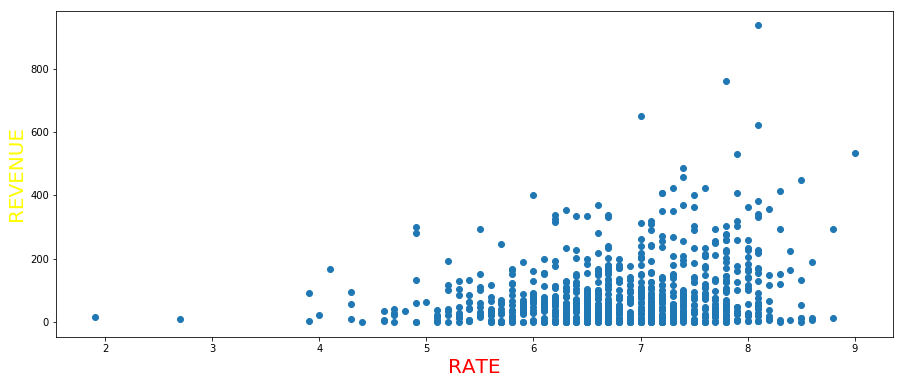

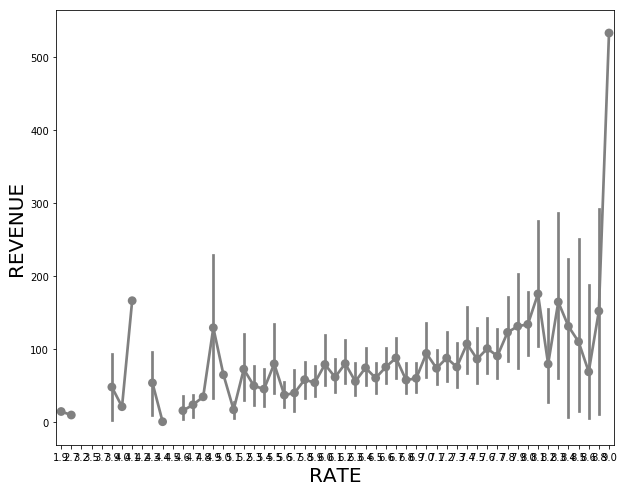

In [25]:
# point plot 
plt.figure(figsize=(10,8)) 
sns.pointplot(dataset['Rating'],dataset['Revenue (Millions)'], color='grey') 
plt.xlabel('RATE').set_size(20) 
plt.ylabel('REVENUE').set_size(20) 

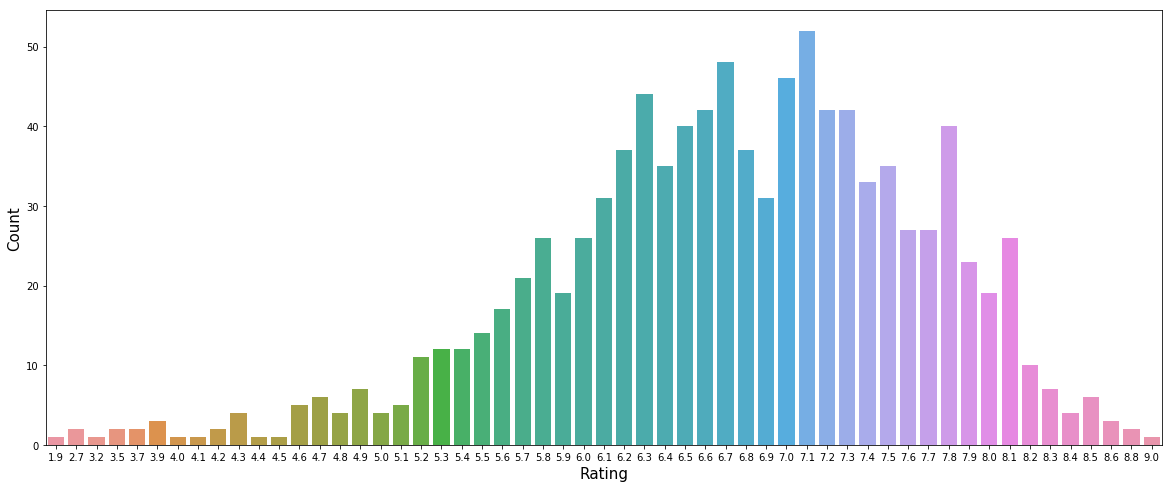

In [26]:
# count plot 
plt.figure(figsize=(20,8)) 
sns.countplot(x=dataset['Rating'].round(2)) 
plt.xlabel('Rating').set_size(15) 
plt.ylabel('Count').set_size(15) 

In [13]:
# Imputation
from sklearn.preprocessing import Imputer
imputer= Imputer(missing_values='NaN', strategy = 'mean', axis=0 )   
imputer = imputer.fit(dataset.iloc[:,10:11])
IMP_Revenue = imputer.transform(Revenue)

from sklearn.preprocessing import Imputer
imputer= Imputer(missing_values='NaN', strategy = 'mean', axis=0 )   
imputer = imputer.fit(dataset.iloc[:,11:])
IMP_Metascore = imputer.transform(Metascore)


In [14]:
# Rename column
IMP_Revenue = pd.DataFrame(data = IMP_Revenue )
IMP_Revenue.rename(columns={0:'IMP_Revenue'},inplace=True)

IMP_Metascore = pd.DataFrame(data = IMP_Metascore )
IMP_Metascore.rename(columns={0:'IMP_Metascore'},inplace=True)




In [15]:
# Encoding for string value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Genre_Label_enc = le.fit_transform(Genre)
Genre_Label_enc = pd.DataFrame(data = Genre_Label_enc )
Genre_Label_enc.rename(columns={0:'Genre_Label_enc'},inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
# Concatanete all data part
dataset_edited = pd.concat([  pd.DataFrame(Genre_Label_enc) ,  dataset.iloc[:,6:10],pd.DataFrame(IMP_Revenue),pd.DataFrame(IMP_Metascore) ],axis=1)
print(dataset_edited)

     Genre_Label_enc  Year  Runtime (Minutes)  Rating   Votes  IMP_Revenue  \
0                 11  2014                121     8.1  757074   333.130000   
1                 85  2012                124     7.0  485820   126.460000   
2                195  2016                117     7.3  157606   138.120000   
3                 92  2016                108     7.2   60545   270.320000   
4                  7  2016                123     6.2  393727   325.020000   
5                  7  2016                103     6.1   56036    45.130000   
6                116  2016                128     8.3  258682   151.060000   
7                108  2016                 89     6.4    2490    82.956376   
8                  2  2016                141     7.1    7188     8.010000   
9                 74  2016                116     7.0  192177   100.010000   
10                80  2016                133     7.5  232072   234.020000   
11               102  2016                127     7.8   93103   

In [17]:
from scipy.stats import skew
print (skew(dataset_edited))

[-0.15622278 -0.68884346  0.84544213 -0.74202676  2.50415504  2.77150147
 -0.12784748]


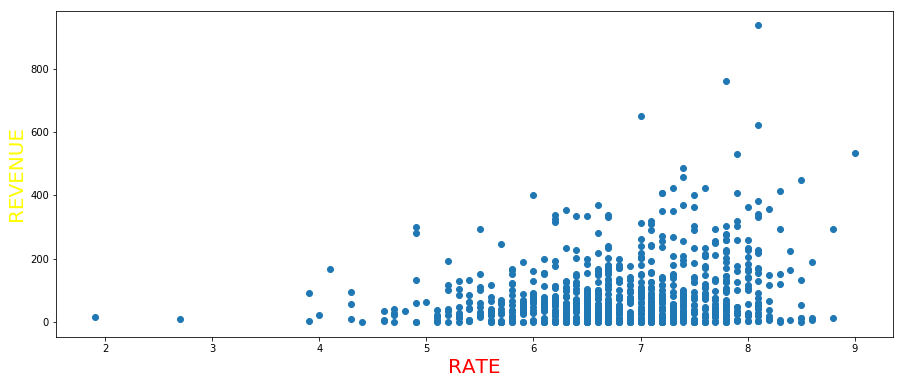

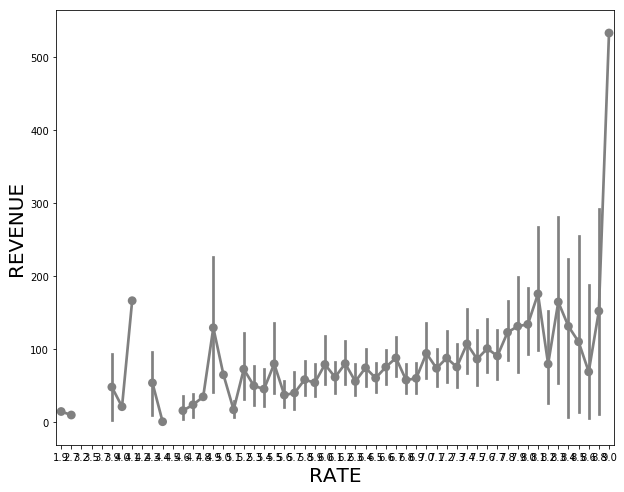

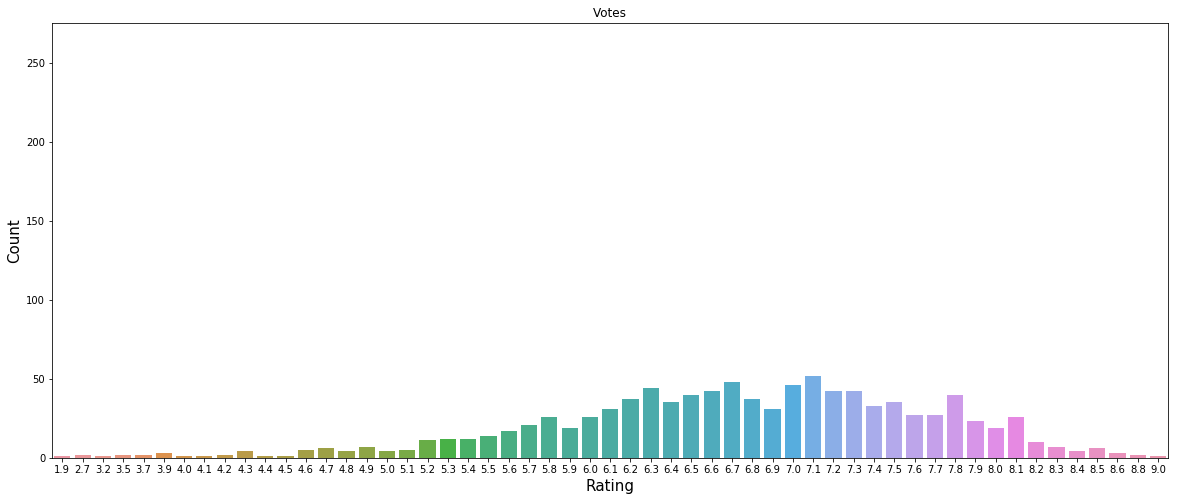

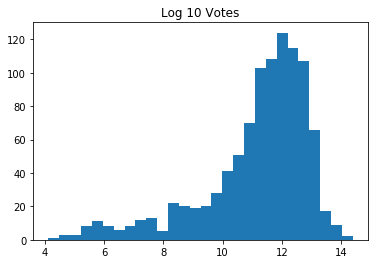

In [18]:
plt.hist(Votes, bins='auto')  # arguments are passed to np.histogram
plt.title("Votes")
plt.show()

plt.hist(np.log(Votes), bins='auto')  # arguments are passed to np.histogram
plt.title("Log 10 Votes")
plt.show()

In [19]:
# Concatanete all data part
Log_Votes = np.log(Votes) 
Log_Votes = pd.DataFrame(data = Log_Votes )
Log_Votes.rename(columns={0:'Log_Votes'},inplace=True)
dataset_edited = pd.concat([  pd.DataFrame(Genre_Label_enc) ,  dataset.iloc[:,6:9], pd.DataFrame(Log_Votes) ,pd.DataFrame(IMP_Revenue),pd.DataFrame(IMP_Metascore) ],axis=1)


In [81]:
y = dataset_edited.iloc[:,3:4]
x = pd.concat([   dataset_edited.iloc[:,1:3] , dataset_edited.iloc[:,5:] ],axis=1)

from sklearn.cross_validation import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)


In [108]:
y = dataset_edited.iloc[:,3:4]
y = y.where(y >= 8.0 , 0 )
y = y.where(y < 8.0 , 1 )


In [181]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


y = dataset_edited.iloc[:,3:4]
y = y.where(y >= 8.0 , 0 )
y = y.where(y < 8.0 , 1 )
x = pd.concat([   dataset_edited.iloc[:,1:3] , dataset_edited.iloc[:,4:] ],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40)

y_train = y_train.values.ravel()

lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)


lr_conf_matrix = pd.DataFrame(data=metrics.confusion_matrix(y_test,lr_pred),index=[[2,3]], columns=[[2,3]])
print(lr_conf_matrix,"Confusion Matrix:")
lr_as = metrics.accuracy_score(y_test,lr_pred)
print("Accuracy Score: {}\n\n".format(lr_as))
print("Classification Report: \n{}".format(metrics.classification_report(y_test,lr_pred)))





     2  3
2  370  5
3   22  3 Confusion Matrix:
Accuracy Score: 0.9325


Classification Report: 
             precision    recall  f1-score   support

        0.0       0.94      0.99      0.96       375
        1.0       0.38      0.12      0.18        25

avg / total       0.91      0.93      0.92       400



In [188]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)


dtc_conf_matrix = pd.DataFrame(data=metrics.confusion_matrix(y_test,lr_pred),index=[[2,3]], columns=[[2,3]])
print(dtc_conf_matrix,"Confusion Matrix:")
dtc_as = metrics.accuracy_score(y_test,dtc_pred)
print("Accuracy Score: {}\n\n".format(dtc_as))
print("Classification Report: \n{}".format(metrics.classification_report(y_test,lr_pred)))


     2  3
2  370  5
3   22  3 Confusion Matrix:
Accuracy Score: 0.91


Classification Report: 
             precision    recall  f1-score   support

        0.0       0.94      0.99      0.96       375
        1.0       0.38      0.12      0.18        25

avg / total       0.91      0.93      0.92       400



In [200]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)


rfc_conf_matrix = pd.DataFrame(data=metrics.confusion_matrix(y_test,lr_pred),index=[[2,3]], columns=[[2,3]])
print(rfc_conf_matrix,"Confusion Matrix:")
rfc_as = metrics.accuracy_score(y_test,rfc_pred)
print("Accuracy Score: {}\n\n".format(rfc_as))
print("Classification Report: \n{}".format(metrics.classification_report(y_test,lr_pred)))

     2  3
2  370  5
3   22  3 Confusion Matrix:
Accuracy Score: 0.95


Classification Report: 
             precision    recall  f1-score   support

        0.0       0.94      0.99      0.96       375
        1.0       0.38      0.12      0.18        25

avg / total       0.91      0.93      0.92       400

